## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [7]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

### 鳶尾花資料集

In [18]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=3, min_samples_leaf=2)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.         0.55828357 0.44171643]


### 視覺化

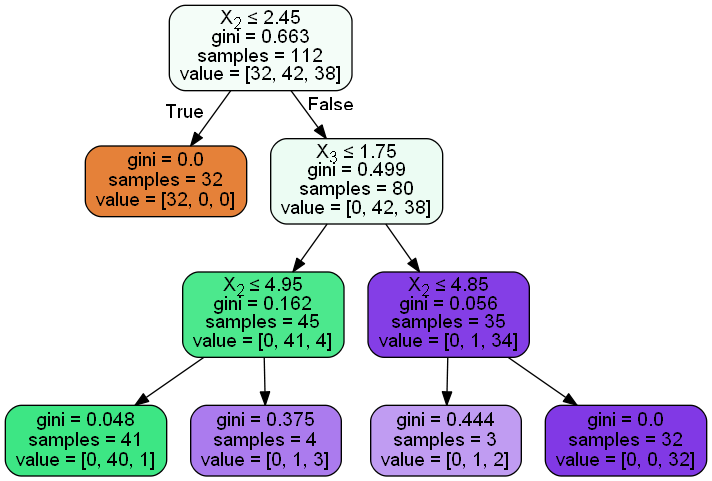

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 決策樹 - wine

In [44]:
# 讀取資料集
#iris = datasets.load_iris()
wine = datasets.load_wine()
#boston = datasets.load_boston()
#breast_cancer = datasets.load_breast_cancer()

datas = wine

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(datas.data, datas.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(datas.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9777777777777777
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.         0.01794699 0.         0.         0.01571782 0.
 0.41359716 0.         0.         0.2188998  0.         0.
 0.33383822]


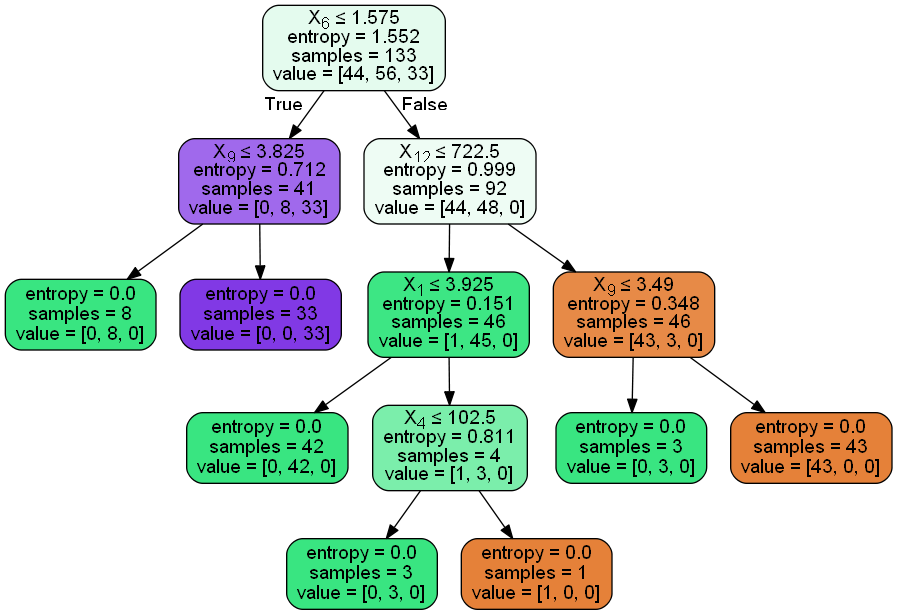

In [45]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 回歸模型 - wine

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 讀取資料集
datas = datasets.load_wine()
#print(datas.keys(),'\n')
#print(datas['DESCR'])

#---
# 只使用資料集中的 1 個 feature (column)
#X = datas.data[:, np.newaxis, 2]
X = datas.data
print("Data shape: ", X.shape)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, datas.target, test_size=0.1, random_state=4)

# 建立一個模型
#regr = linear_model.LinearRegression()
reg = linear_model.LogisticRegression()

# 將訓練資料丟進去模型訓練
reg.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = reg.predict(x_test)

#---
# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
#---
# 畫出回歸模型與實際資料的分佈
#plt.scatter(x_test, y_test,  color='black')
#plt.plot(x_test, y_pred, color='blue', linewidth=3)
#plt.show()

#---
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Data shape:  (178, 13)
Coefficients:  [[-5.88852656e-01  6.67300827e-01  1.00960693e+00 -5.80989219e-01
  -3.55178256e-02  3.62071144e-01  1.18894658e+00  3.78340624e-03
  -4.54784892e-01 -1.53560698e-01 -1.62107824e-01  9.11550191e-01
   1.77906683e-02]
 [ 9.31771389e-01 -1.08459849e+00 -7.53390627e-01  2.41931110e-01
   1.24181909e-02  3.53858216e-02  5.76719638e-01  5.39359650e-01
   6.06710292e-01 -1.86151560e+00  9.52831552e-01  7.69014213e-02
  -1.44579779e-02]
 [-3.44877619e-01  6.57378630e-01  3.90432260e-02  1.20175740e-01
   1.94696375e-02 -6.60620544e-01 -1.84324382e+00 -9.24618142e-02
  -6.79666411e-01  1.08773341e+00 -4.94768310e-01 -1.20152083e+00
   2.92068606e-04]]
Mean squared error: 0.06
Accuracy:  0.9444444444444444
